In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie
Proszę wygenerować dane tak by 1. i 3. współrzędna były skorelowane a pozostałe nie.
Proszę zwizualizować tą zależność za pomocą 

- sns.pairplot
- sns.heatmap

Genereuje punkty:

In [3]:
n=1000
x1=stats.norm(0,1).rvs(n)
# x1=stats.uniform().rvs(size=n)
x2=stats.norm(0,1).rvs(n)
x4=stats.norm(0,1).rvs(n)
X=np.stack((x1,x2, 2*x1, x4 ),1)

Rysuje punkty jako pary współrzednych:

            0         1         2         3
0    0.025437  0.830184  0.050873 -1.119106
1   -0.619398  0.345022 -1.238797  0.614385
2    0.711905  2.336593  1.423810 -0.932125
3   -0.574395 -0.089295 -1.148790  0.235176
4    1.584943 -1.050770  3.169886 -0.798670
..        ...       ...       ...       ...
995  1.602711 -1.357827  3.205422 -0.240636
996 -0.697106 -0.411662 -1.394213 -0.581594
997 -1.740686 -0.117634 -3.481372 -1.495688
998  0.856256 -1.299258  1.712512  0.940316
999 -0.052940 -0.253987 -0.105880 -0.026210

[1000 rows x 4 columns]


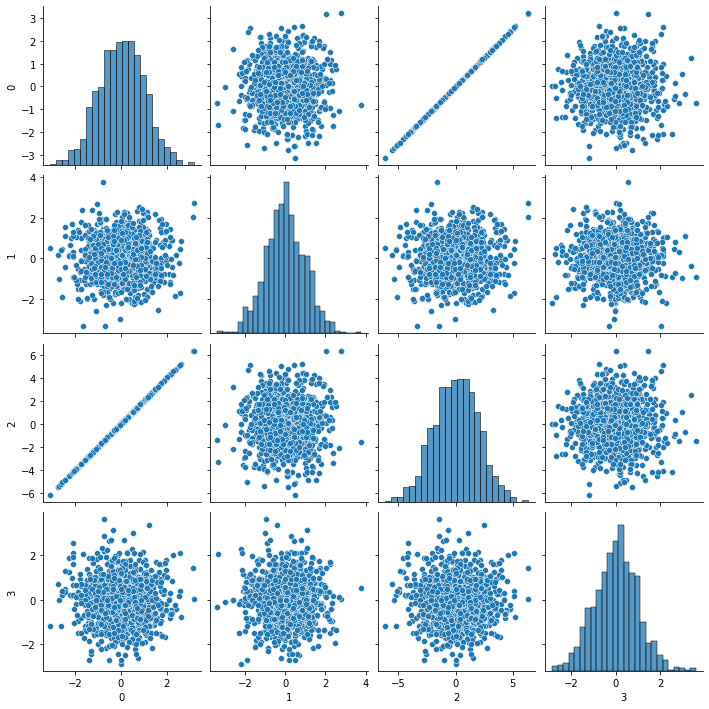

In [4]:
df=pd.DataFrame(X)
print(df)
sns.pairplot(df)#, kind="reg"
plt.show()

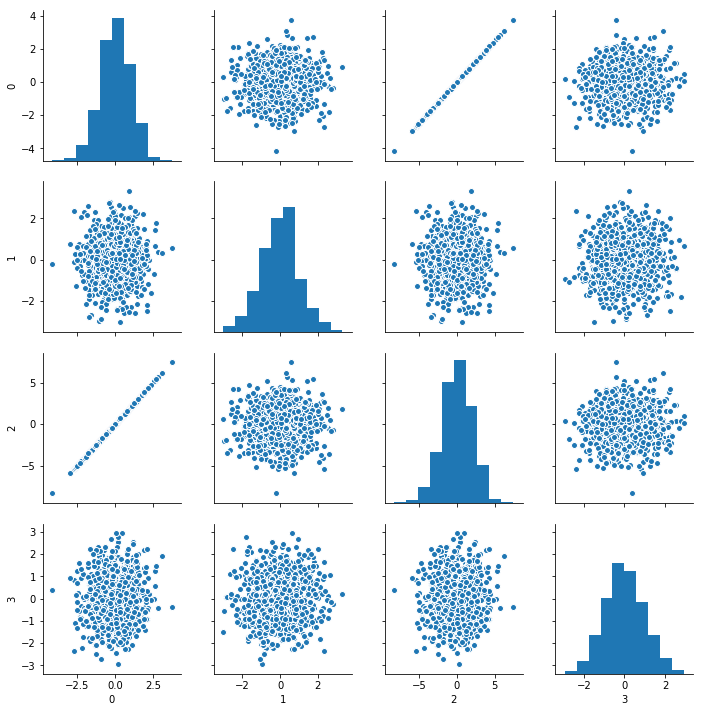

In [10]:
df=pd.DataFrame(X)
sns.pairplot(df)
plt.show()

Rysuję macierz korelacji za pomocą <tt>heatmap</tt>.

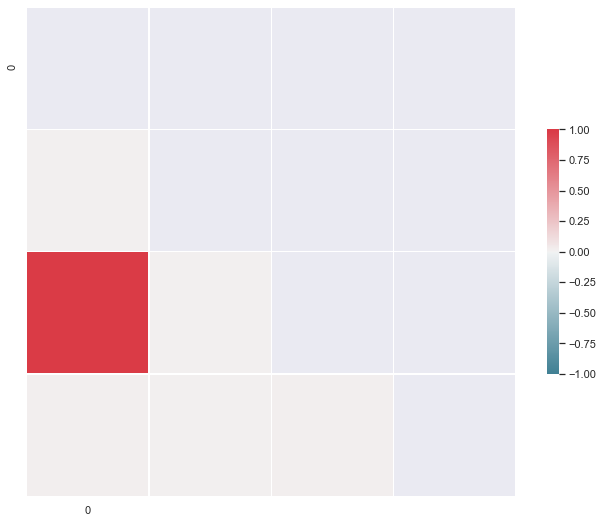

,0,1,2,3
0,1.000000,0.013693,1.000000,0.023123
1,0.013693,1.000000,0.013693,0.008040
2,1.000000,0.013693,1.000000,0.023123
3,0.023123,0.008040,0.023123,1.000000


In [6]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

# Zadanie
Wygeneruj dane 10. wymiarowe tak by 

- 1 3 5 współrzedna były skorelowane ze sobą dodatnio
- 7 8 współrzedna były skorelowane ze sobą ujemnie
- pozostałe były nieskorelowane


# Zad 
Dodaj kilka współrzednych tak by były skorelowanie nieliniowo np. $x^2$
* czy widać jakiś efekt na heat map

# Zadanie
Wykonaj wykresy
- sns.pairplot
- sns.heatmap

dla poniższego zbioru danych


In [13]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data